In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df =  pd.read_csv("electric.csv", index_col=0)
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467


In [3]:
df.index

Index(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01', '1985-05-01',
       '1985-06-01', '1985-07-01', '1985-08-01', '1985-09-01', '1985-10-01',
       ...
       '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
       '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01'],
      dtype='object', name='DATE', length=421)

In [4]:
df.index = pd.to_datetime(df.index)

In [5]:
df.index

DatetimeIndex(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01',
               '1985-05-01', '1985-06-01', '1985-07-01', '1985-08-01',
               '1985-09-01', '1985-10-01',
               ...
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01'],
              dtype='datetime64[ns]', name='DATE', length=421, freq=None)

In [6]:
df.columns = ['Energy Production']
df.head()

,Energy Production
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467


In [7]:
# Date component should be in the index of the dataframe
# The index should be in pandas date-time format

<AxesSubplot:xlabel='DATE'>

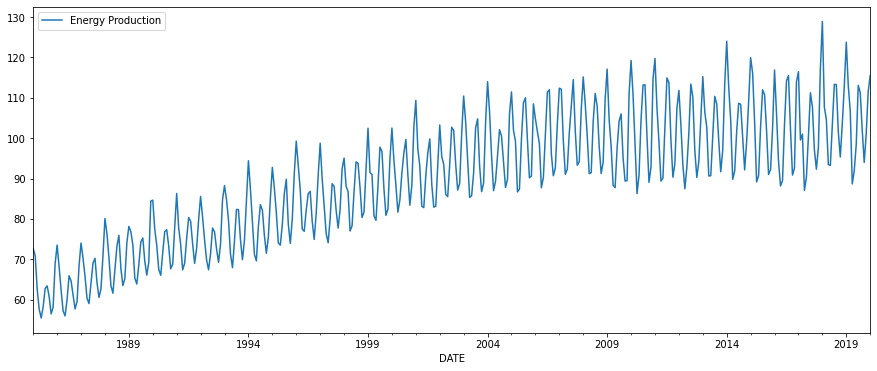

In [8]:
df.plot(figsize = (15,6))

In [9]:
# Decompostion of time series 


# Trend , Seasonality etc. 


## Will you have do it by writing your own function - NO 


# sm.tsa.seasonal_decompose
#df


# Residuals 


# Actual Predicted 

# Residuals or error - Acutal - Predicted

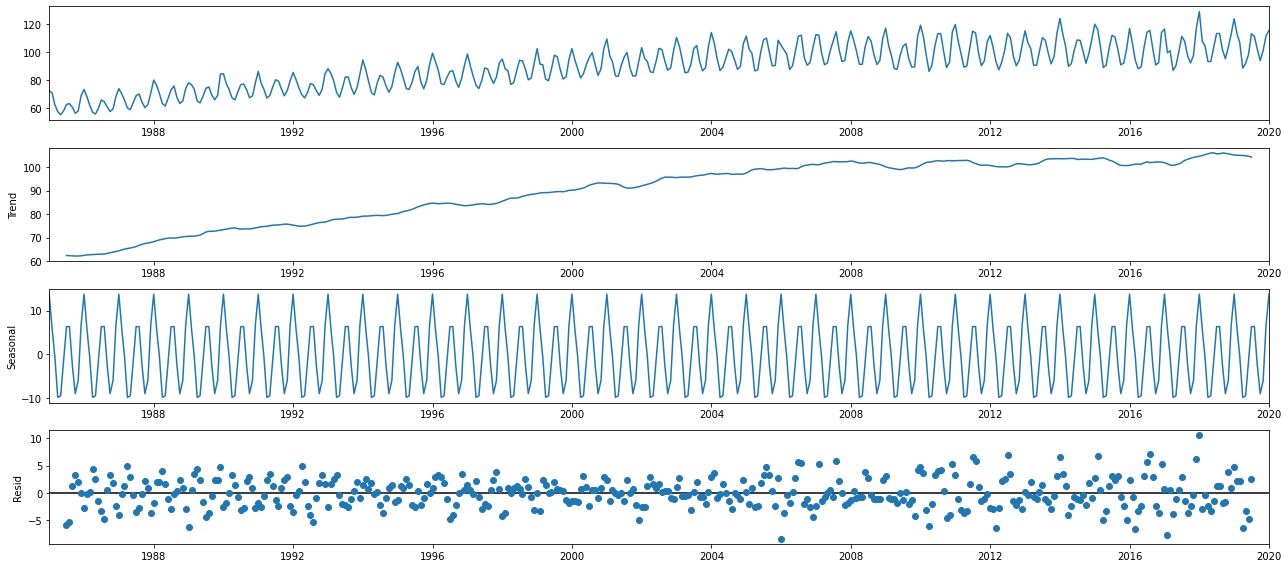

In [10]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(df, model = "additive")
fig = decomposition.plot()

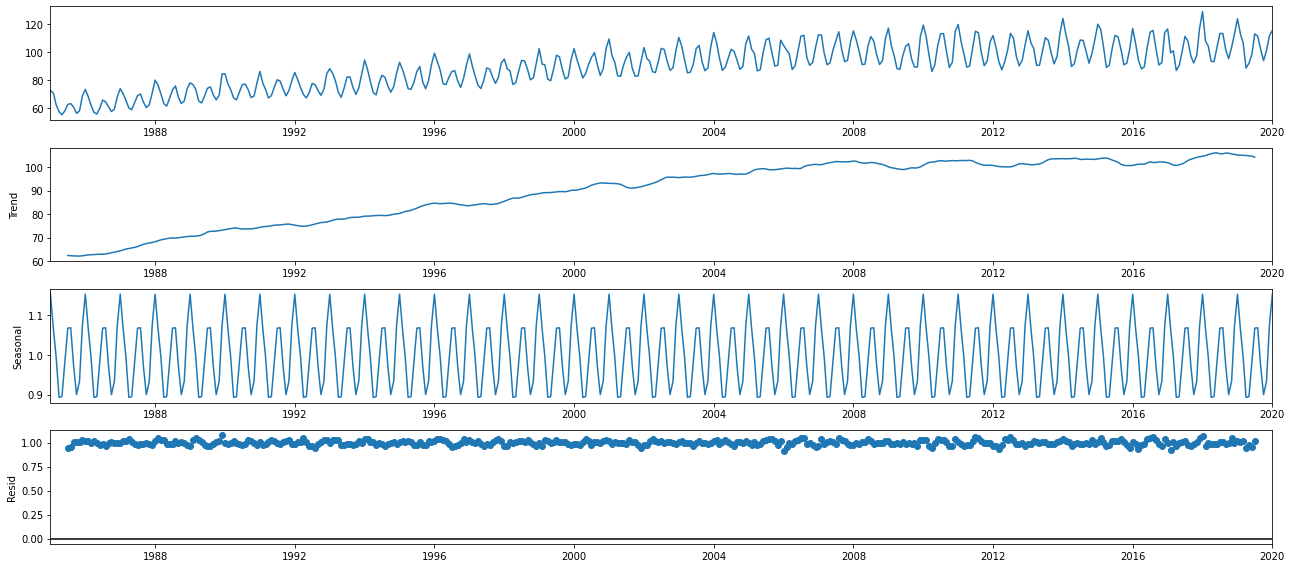

In [11]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(df, model = "multiplicative")
fig = decomposition.plot()

## Simple Moving Average Model

In [12]:
df.head(n=5)

,Energy Production
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467


In [13]:
df_ma = df.copy()

# windows function 

# rolling 


df_ma['SMA_12'] = df_ma.rolling(window = 12).mean()
df_ma.head(20)

,Energy Production,SMA_12
DATE,,
1985-01-01,72.6803,NaN
1985-02-01,70.8479,NaN
1985-03-01,62.6166,NaN
1985-04-01,57.6106,NaN
1985-05-01,55.4467,NaN
1985-06-01,58.2228,NaN
1985-07-01,62.7591,NaN
1985-08-01,63.3921,NaN
1985-09-01,60.7507,NaN


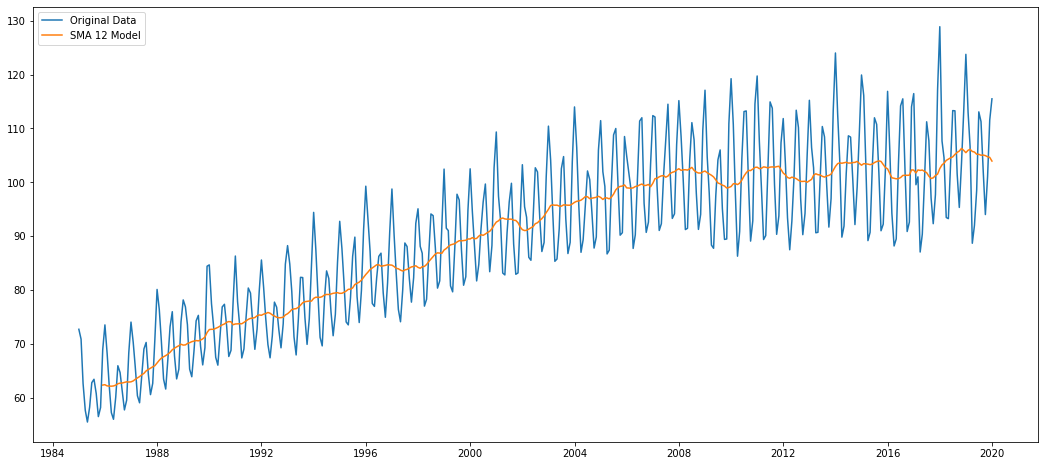

In [14]:
plt.plot(df_ma['Energy Production'], label = 'Original Data')
plt.plot(df_ma['SMA_12'], label = "SMA 12 Model")
plt.legend()

In [15]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true)) *100



In [16]:
mape(df_ma['Energy Production'], df_ma['SMA_12'])

7.32645161473586

## Stationarity Check using ADF TEST

In [17]:
import statsmodels.tsa.stattools as ts

adf_test = ts.adfuller(df)

print("p-value % 0.04f" % adf_test[1])

p-value  0.0873


- Null: Time Series is not stationary
- Alternate: Time Series is Stationary

Faile to reject Null. Conclude that my time series is not stationary

In [18]:
df.head()

,Energy Production
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467


In [19]:
# Let's a one order differencing

df.diff()

,Energy Production
DATE,
1985-01-01,NaN
1985-02-01,-1.8324
1985-03-01,-8.2313
1985-04-01,-5.0060
1985-05-01,-2.1639
...,...
2019-09-01,-9.2658
2019-10-01,-8.0039
2019-11-01,7.0766


In [20]:
import statsmodels.tsa.stattools as ts

adf_test = ts.adfuller(df.diff().dropna())

print("p-value % 0.04f" % adf_test[1])

p-value  0.0000


<AxesSubplot:xlabel='DATE'>

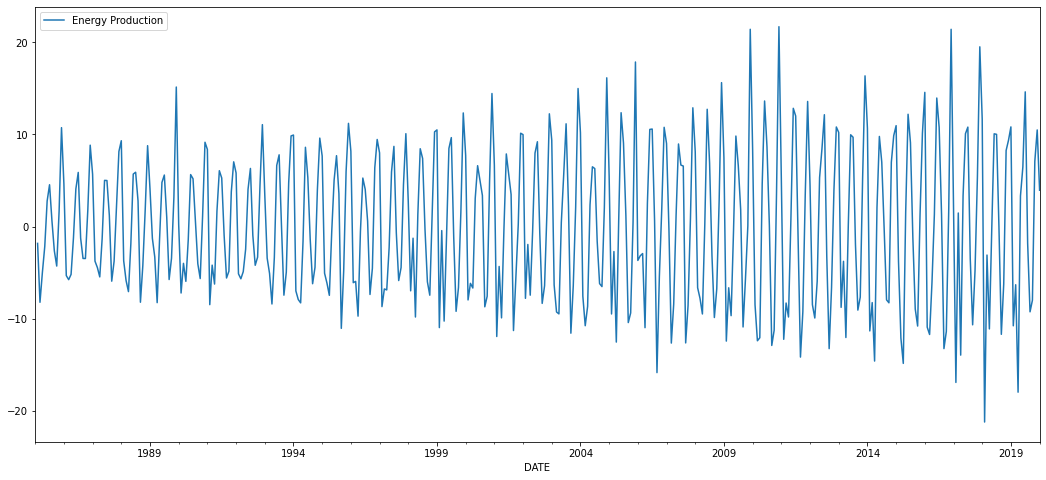

In [21]:
df.diff().plot()

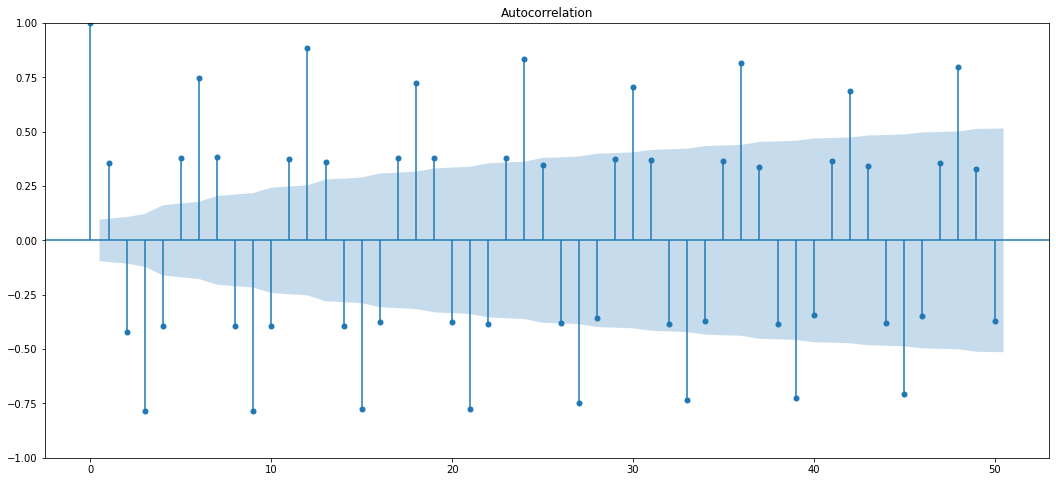

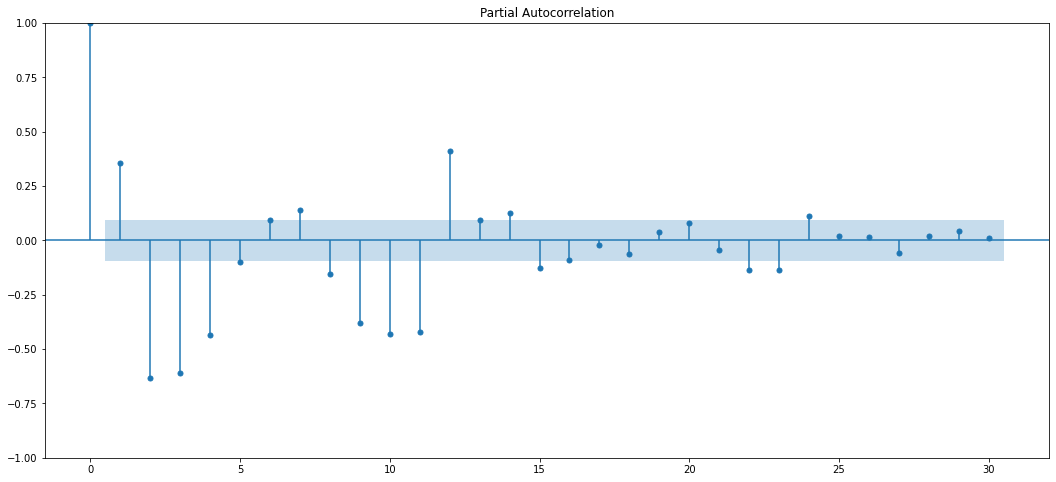

In [22]:
import statsmodels.graphics.tsaplots as tsa
tsa.plot_acf(df.diff().dropna(), lags =50)
tsa.plot_pacf(df.diff().dropna(), lags = 30)
plt.show()

In [23]:
# p = 24
# d = 1
# q = 0


In [24]:
# p = 12
# d = 1
# q = 0

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df, order = (12, 1, 0))
results_ar = model.fit()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [26]:
results_ar.summary().tables[1]

NameError: name 'results_ar' is not defined

In [ ]:
pred = results_ar.predict(typ = 'levels')
pred

In [ ]:
plt.plot(df, label = 'Original Time Series')
plt.plot(pred, label = 'AR 12 Model')
plt.legend()

In [25]:
df_ar = df.copy()
df_ar['AR 12'] = pred

NameError: name 'pred' is not defined

In [59]:
mape(df_ar['Energy Production'], df_ar['AR 12'])

2.2232151935572064

In [60]:
results_ar.predict(start = "2020-01-01", end = '2020-06-01', typ = 'levels')

2020-01-01    121.551212
2020-02-01    110.877585
2020-03-01    104.138326
2020-04-01     90.330125
2020-05-01     93.185471
2020-06-01    102.174550
Freq: MS, dtype: float64

In [61]:
help(results_ar.predict)

Help on method predict in module statsmodels.tsa.arima_model:

predict(start=None, end=None, exog=None, typ='linear', dynamic=False) method of statsmodels.tsa.arima_model.ARIMAResultsWrapper instance
    predict(self, start=None, end=None, exog=None, typ='linear', dynamic=False)
    
    ARIMA model in-sample and out-of-sample prediction
    
    Parameters
    ----------
    
    start : int, str, or datetime
        Zero-indexed observation number at which to start forecasting, ie.,
        the first forecast is start. Can also be a date string to
        parse or a datetime type.
    end : int, str, or datetime
        Zero-indexed observation number at which to end forecasting, ie.,
        the first forecast is start. Can also be a date string to
        parse or a datetime type. However, if the dates index does not
        have a fixed frequency, end must be an integer index if you
        want out of sample prediction.
    exog : array_like, optional
        If the model is an A